In [158]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

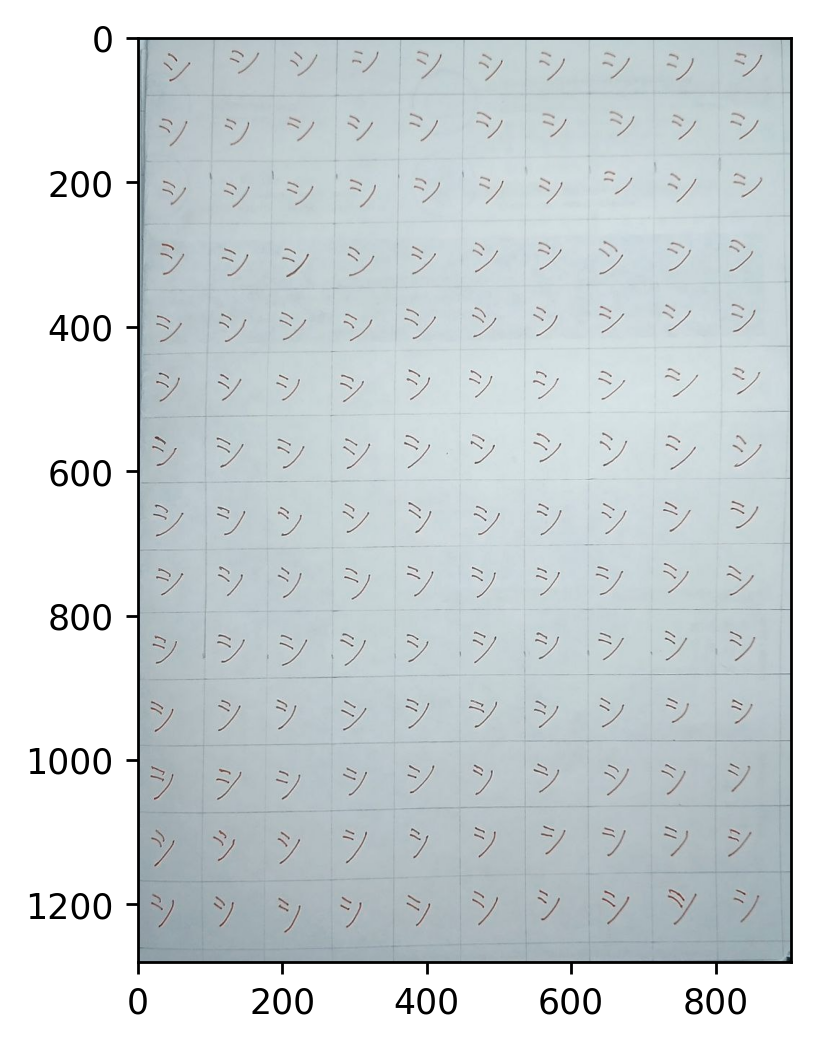

In [159]:
file_name = './data-raw/1.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
plt.imshow(source_img)

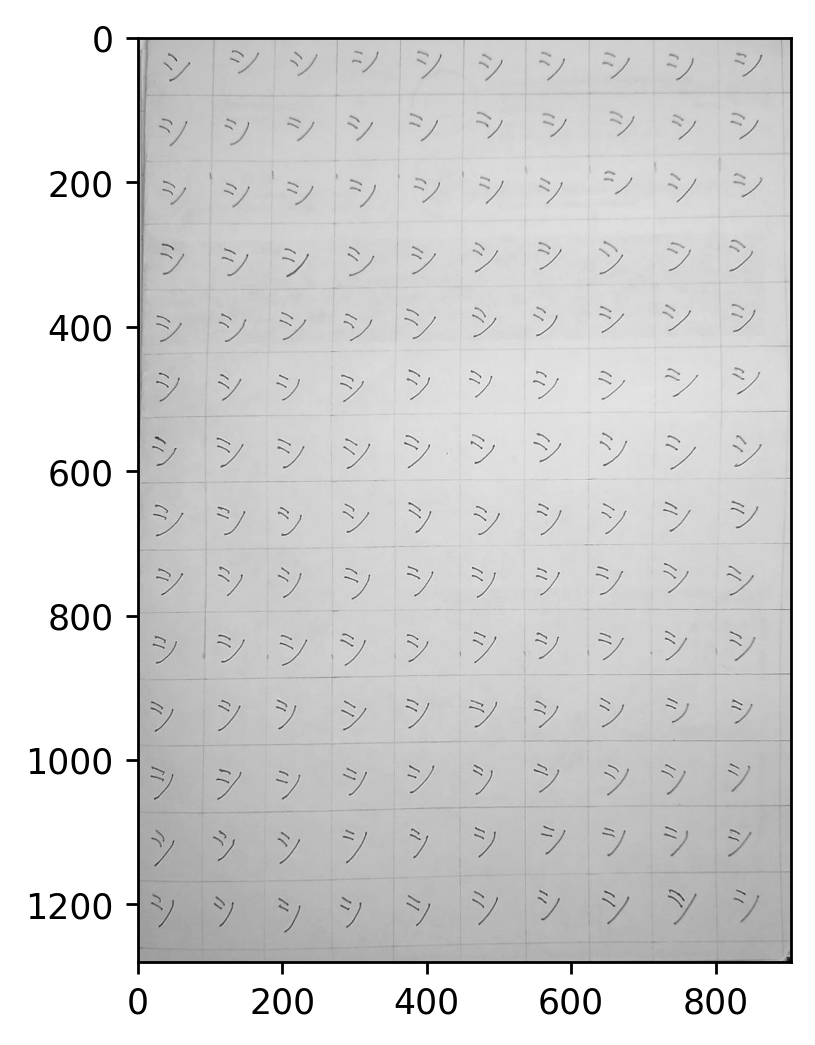

In [160]:
img = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY)
h, w = img.shape
plt.imshow(img, cmap='gray')

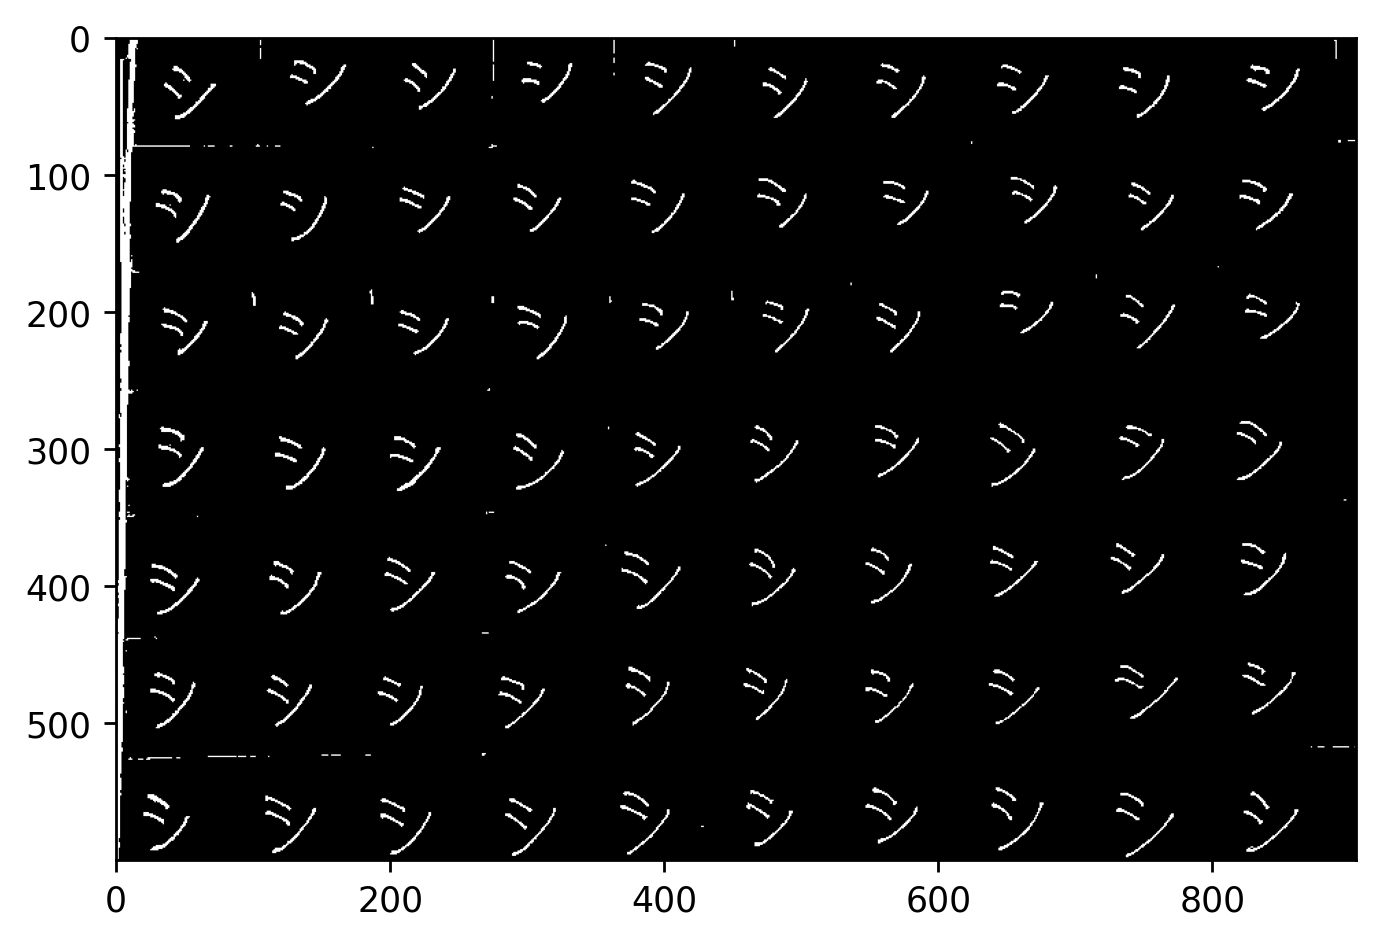

In [161]:
upper_part = img[:600, 0:w]
_, upper_part_bin = cv2.threshold(upper_part, 170, 255, cv2.THRESH_BINARY_INV)
plt.imshow(upper_part_bin , cmap='gray')

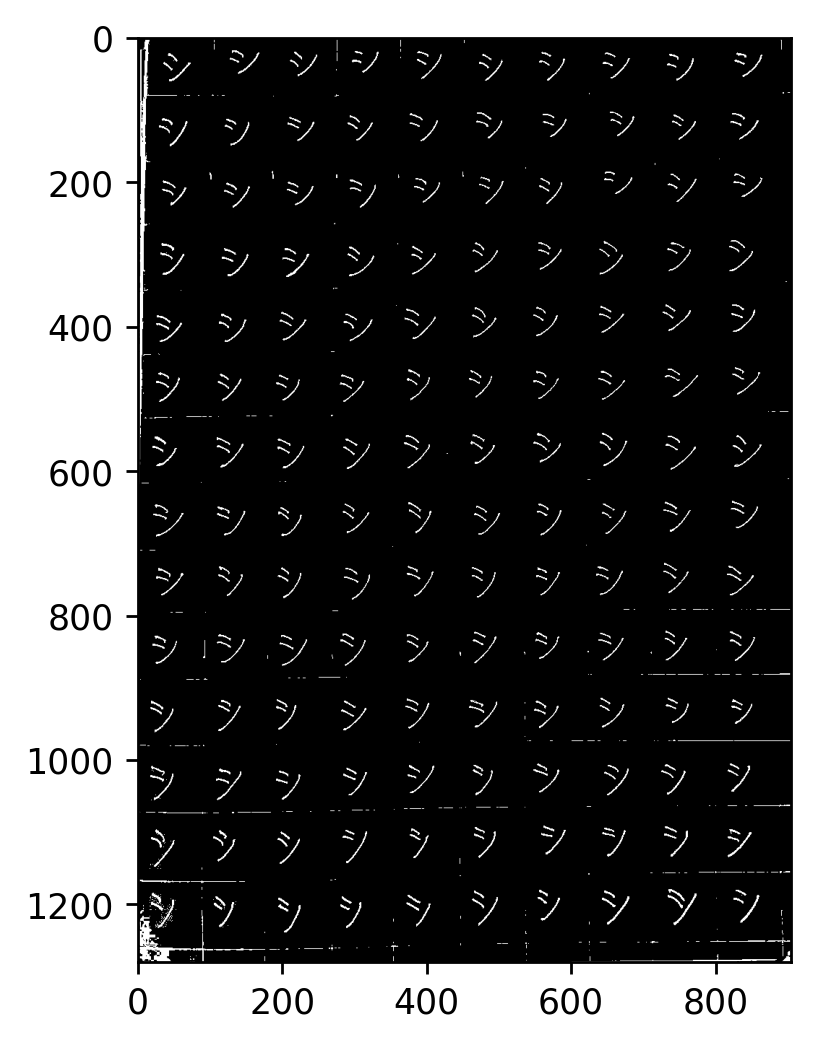

In [162]:
_, img_bin = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)
img_bin[:600, 0:w] =upper_part_bin
plt.imshow(img_bin, cmap='gray')

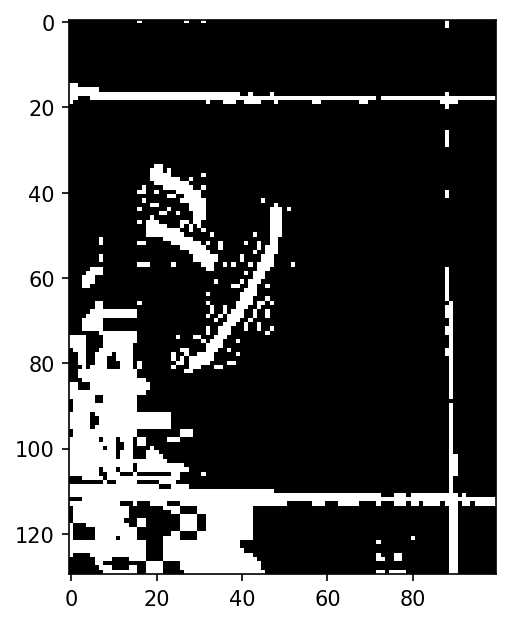

In [163]:
cropped = img_bin[1150:h, 0:100]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.imshow(cropped, cmap='gray')

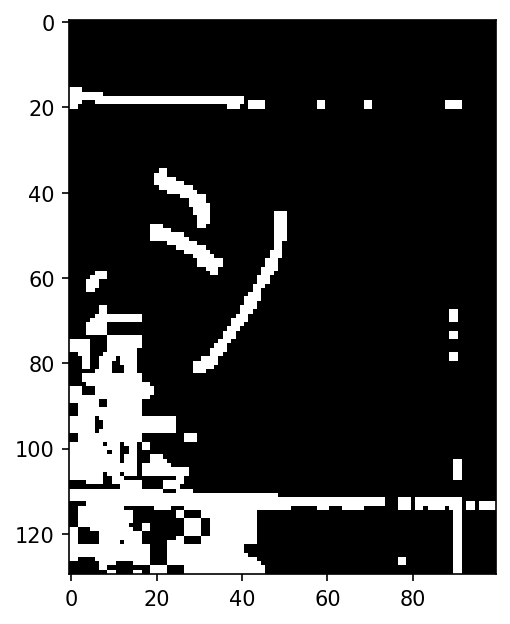

In [164]:
# чистим грязь
kernel = np.ones((2,2), np.uint8)
cropped = cv2.morphologyEx(cropped, cv2.MORPH_OPEN, kernel)
plt.imshow(cropped, cmap='gray')

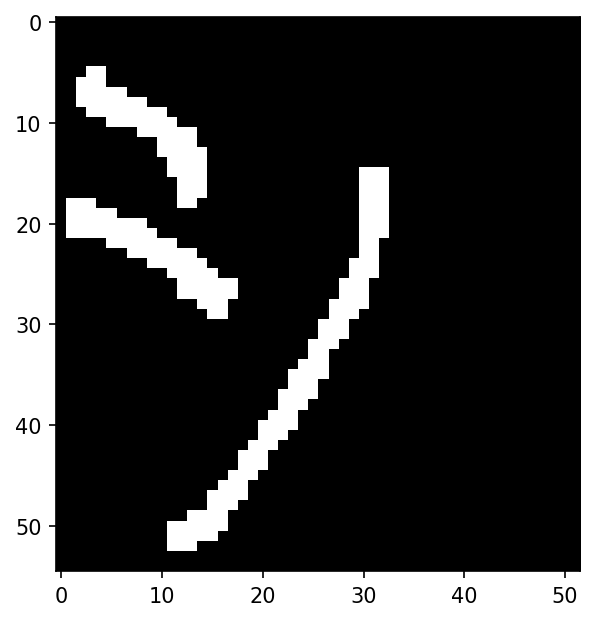

In [165]:
cropped_only_symbol = cropped[30:85, 18:70]
plt.imshow(cropped_only_symbol, cmap='gray')

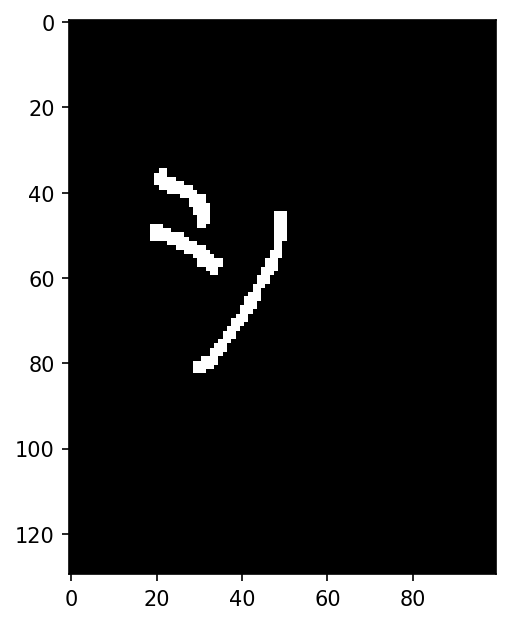

In [166]:
cleaned_cropped = np.zeros(cropped.shape, dtype="uint8") 
cleaned_cropped[30:85, 18:70] = cropped_only_symbol
plt.imshow(cleaned_cropped, cmap='gray')

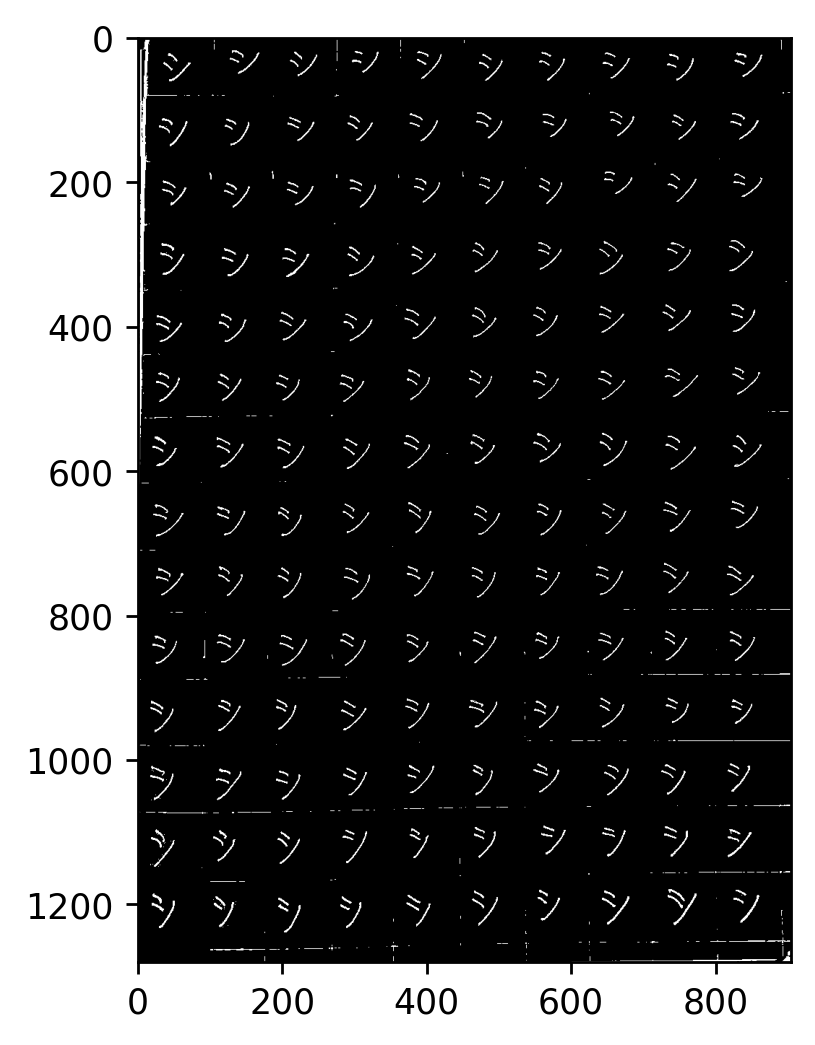

In [167]:
img_bin[1150:h, 0:100] = cleaned_cropped

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250
plt.imshow(img_bin, cmap='gray')

In [168]:
cv2.imwrite('./data-prepared/1.jpg', img_bin)

True